# Empfehlungen für Regressionen/Regressionsanalyse

### 1 Theoretischer Hintergrund

Lineare Regression zählt zum Gebiet des überwachten Lernens, da wir Punkte betrachten, deren genaue Position immer bekannt ist. Eine gute Gerade/Kurve wird benötigt, um aus den Trainingsdaten gute Abschätzungen für zukünftige Punkte bzw. Entwicklungen (z. B. Umsatzentwicklung) treffen zu können.

#### 1.1 Ausgleichungsrechnung

 Hierbei sollen Punkte bzw. Messdaten, die zwischen den vorhandenen Punkten liegen, möglichst genau bestimmt/geschätzt werden, indem eine Gerade/Kurve durch die Punkte gelegt wird. Welche Daten von den einzelnen Punkten genau repräsentiert werden, ist irrelevant (Wachstumsrate, Umsatz, Bevölkerungsanzahl).

#### 1.2 Methode der kleinsten Quadrate (ordinary least squares)

Um zu einer Menge an Punkten eine möglichst gut passende Kurve zu finden, wird häufig die Methode der kleinsten Quadrate verwendet, die zum Bereich der deskriptiven Statistik gehört und das mathematische Standardverfahren der Ausgleichungsrechnung darstellt. Hierbei sollen die Parameter der Geraden/Kurve, die durch eine Punktwolke gelegt wird, so bestimmt werden, dass die Distanz (als Quadratsumme) der einzelnen Punkte der Funktion von den Beobachtungen möglichst minimiert wird. Residuen bezeichnen die vertikale Distanz zwischen Datenpunkt und Funktion.
Formalisiert sieht die Methode so aus:

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})²
$$

#### 1.3 Plot einer Beispielfunktion

<img src="img/ols_example.png" width="600">

### 2.  Beispiel: Vorhersage der Immobilienpreise in Boston

In [1]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

Text(0.5,1,'Immobilienpreise in Boston')

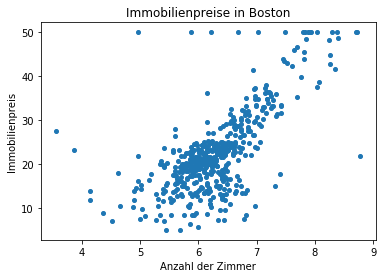

In [2]:
boston = load_boston()
plt.plot(boston.data[:,5], boston.target, 'o', markersize = 4)
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')

Erster Plot mithilfe von OLS.

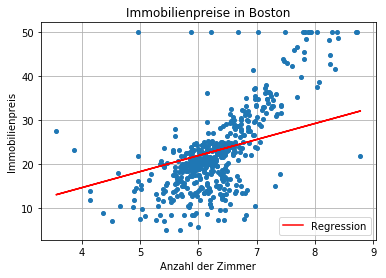

In [3]:
import numpy as np

x_old = boston.data[:,5]
x_old = np.array([[v] for v in x_old])

y = boston.target
slope = np.linalg.lstsq(x_old,y, rcond=None)

plt.plot(x_old[:,0], y, 'o', markersize = 4)
plt.plot(x_old[:,0],slope[0][0] * x_old[:,0], 'r', label='Regression')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

Die durch die Punkte gelegte Regressionsgerade ist nicht optimal, da sie suggeriert, dass der Preis einer Immobilie das Vielfache der Anzahl der Zimmer darstellt. Somit wäre im Durchschnitt der Preis für eine Immobilie mit zwei Zimmern doppelt so hoch wie der Preis für eine Immobilie, das ein Zimmer enthält. Der Preis für eine Immobilie mit drei Zimmern würde dementsprechend das dreifache vom Preis der Immobilie mit einem Zimmer betragen ... usw.
Wir wissen mit Sicherheit, dass diese Annhame falsch ist und sich auch approximativ nicht bestätigen lassen würde. Eine Möglichkeit, dieses Problem zu lösen, besteht darin, eine konstante Größe hinzuzufügen (*bias term*). Diese Konstante stellt den Preis für ein Apartment ohne Schlafzimmer dar. Formal wird jeder X-Wert um eins erhöht. Dies funktioniert, indem der zweiten Dimension der Matrix von x der Wert 1 hinzugefügt wird. Nur deswegen lässt sich eine Konstante von der Funktion *np.linalg.lstsq()* überhaupt abrufen.

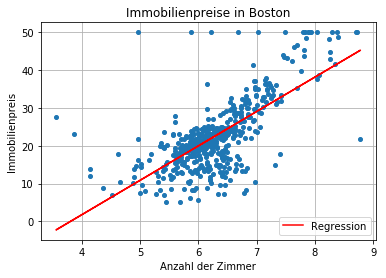

In [4]:
x = boston.data[:,5]
x = np.array([[v,1] for v in x]) # An dieser Stelle wird der zweiten Dimension von x eine 1 hinzugefügt
y = boston.target
(slope,bias),_,_,_ = np.linalg.lstsq(x,y, rcond=None)
plt.plot(x[:,0], y, 'o', markersize = 4)
plt.plot(x[:,0], slope * x[:,0]+ bias, 'r', label='Regression')
plt.xlabel('Anzahl der Zimmer')
plt.ylabel('Immobilienpreis')
plt.title('Immobilienpreise in Boston')
plt.grid(True)
plt.legend()
plt.show()

### 2.1  Evaluation der Ergebnisse mithilfe des RMSE

Nun würden wir gerne in Zahlen ausdrücken, wie gut unsere Regressionsgerade ist. 
Die Standardabweichung von den Residuen wird auch als *root mean squared error* (RMSE) bezeichnet. Hiermit lässt sich quantifizieren, wie gut unsere Funktion schätzt. Ferner gibt diese Kennzahl Auskunft darüber, wie weit unsere Funktion von den einzelnen Datenpunkten entfernt ist.
Für jedes Element von x wird der Fehler einzeln berechnet, indem von der Regressionsgeraden immer die Distanz zum eigentlichen Punkt berechnet wird. Diese Distanz wird daraufhin quadriert, alle quadrierten Werte werden summiert. Wir dividieren nun aber noch diese Summe durch die Anzahl der Werte von x und ziehen die Wurzel, um ein verständlicheres Ergebnis zu erhalten. Formal sieht der RMSE folgendermaßen aus.

$$
RMSE = \ \sqrt{\frac{\sum_{i}^n (z_{fi} - z_{oi})²}{n}}
$$

In Python lässt sich der RMSE mithilfe der np.linalg.lstsq()-Funktion in zwei Zeilen berechnen.

In [5]:
(slope,bias),total_error,_,_ = np.linalg.lstsq(x,y, rcond=None)
rmse = np.sqrt(total_error[0]/len(x))
print('RMSE: {:.3}'.format(rmse))

RMSE: 6.6


Zum Vergleich der RMSE unserer ersten Regressionsgeraden:

In [6]:
slope,total_error,_,_ = np.linalg.lstsq(x_old,y, rcond=None)
rmse = np.sqrt(total_error[0]/len(x_old))
print('RMSE: {:.3}'.format(rmse))

RMSE: 7.64


Der Abstand der einzelnen Punkte zur Funktion ist bei Verwendung einer Konstanten geringer geworden. Somit passt sich unsere Funktion den Trainingsdaten besser an als zuvor.

### 3. Multidimensionale Regression

Bis jetzt haben wir lediglich eine einzige Variable für unsere Vorhersage betrachtet, nämlich die Anzahl der Zimmer. Nun werden wir alle Daten verwenden, die uns zur Verfügung stehen, um eine multidimensionale Regression durchführen zu können. Wir versuchen nun den durchschnittlichen Immobilienpreis basierend auf mehreren Variablen zu berechnen. 

In [7]:
x = np.array([np.concatenate((v, [1])) for v in boston.data])
y = boston.target

s, total_error, _, _ = np.linalg.lstsq(x, y, rcond=None)

rmse = np.sqrt(total_error[0] / len(x))
print('RMSE: {:.3}'.format(rmse))

RMSE: 4.68


Da das Fehlerquadrat nur noch 4,68 beträgt, haben wir eine Verbesserung erzielt im Vergleich zum vorherigen Ergebnis. Das spricht dafür, dass die zusätlichen Variablen durchaus geholfen haben. Leider lässt sich dies nicht mehr so leicht grafisch darstellen, da wir eine 14-dimensionale Regression haben.

### 4. Cross-validation

Um sicher gehen zu können, dass unsere Berechnungen stimmen, verwenden wir die zwei Bibliotheken LinearRegression und mean_squared_error. Mithilfe der bereitgstellten Funktionen lässt sich der *root mean squared error* vereinfacht berechnen.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("Root mean squared error (of training data): {:.3}".format(rmse))

Mean squared error (of training data): 21.9
Root mean squared error (of training data): 4.68


Durch die leichtere Berechnung durch das Interface haben wir nun nochmals überprüft, dass unsere Berechnungen gestimmt haben.

#### 4.1 Generelle Evaluation der Regression (*10-fold cross-validation*)

Um generell sagen zu können, wie gut unsere Regression ist, wenden wir den 10fachen *cross-validation loop* an. Hierbei erfahren wir, wie gut unsere Regression im Allgemeinen vorhersagen treffen kann. Der Code stellt eine Adaption der Implementierung des Github-Users <a href="https://github.com/luispedro">Luis Pedro Coelho</a> dar.

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

data = boston.data
target = boston.target

lr = LinearRegression()

pred = np.zeros_like(target)
kf = KFold(len(target), n_folds=10)
for train, test in kf:
    lr.fit(data[train], target[train])
    pred[test] = lr.predict(data[test])

print('RMSE on 10-fold CV: {:.3}'.format(np.sqrt(mean_squared_error(target, pred))))

RMSE on 10-fold CV: 5.88


/home/simon/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Der *rmse* ist nun etwas höher als zuvor. Dies ist eine bessere Schätzung, wie gut wir im Allgemeinen Preise vorhersagen können.

Die Methode der kleinsten Quadrate ist eine gute Methode, um schnell ein Modell sowie Vorhersagen zu erhalten. Deswegen sollte es normalerweise das erste Modell sein, das verwendet wird, wenn eine Regression benötigt wird. 

### 5. *Penalized Regression*

Bei einer gewöhnlichen Regression stellt die beste Kurve/Gerade lediglich die beste Regression für die Trainingsdaten dar, kann jedoch zu *overfitting* führen. 

<img src="img/overfitting.png" width="800">

Beim *penalizing* wird ein bestimmter Betrag den Parametern hinzugefügt, um dies zu verhindern. Hierbei handelt es sich um einen Kompromiss aus bestem Ergebnis für die Trainingsdaten und dem Verhindern des *overfitting*.
Dazu wird eine Konstante hinzugefügt, die dafür sorgt, dass die Abweichung verringert wird, jedoch wird auch die übermäßige Anpassung an die Trainingsdaten verhindert.

#### 5.1 Formalisierung von *L1 penalty (Lasso)* und *L2 penalty (Ridge)*

Formal sieht die Methode der kleinsten Quadrate so aus:

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})²
$$

Ein *L1 penalty* wird hinzugefügt, um die Varianz zu verringern. Lambda steht für eine selbstdefinierte Zahl. 

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})² + \lambda\sum_{i} |b_i|
$$

Ein *L2 penalty* wird hinzugefügt, indem der Koeffizient b quadriert wird.

$$
\vec{b} = arg \ min _{\vec{b}} (y - X\vec{b})² + \lambda\sum_{i} |b_i|²
$$

Beide Methoden führen zu kleineren Koeffizienten. Beim Lasso-Penalty entstehen allerdings auch einige Nullen. Dies ist eine sehr wünschenswerte Eigenheit: Da deswegen nicht alle Werte aus dem Feature-Vektor verwendet werden können, greift das Model auf Feature-Werte zu __und__ wendet Regression an. 

Je größer der Koeffizient lambda vor der Summe ist, desto größer ist die Abweichung des Ergebnisses von der Methode der kleinsten Quadrate. Wird lambda jedoch auf Null gesetzt, erhält man de facto das Ergebnis der Methode der kleinsten Quadrate.

Eine Kombination der beiden Penalty-Arten wird *Elastic net* genannt. Hierbei werden zwei *penalties* verwendet, einen für den absoluten Wert und einen für den quadrierten Wert.

#### 5.2 Implementierung der Methoden

##### 5.2.1 Plot mit OLS und Lasso

Im folgenden Code wird sowohl eine Gerade mithilfe von OLS durch die uns bekannten Punkte gelegt als auch eine Gerade mithilfe des *L1 penalty (Lasso)*. Das Lambda beträgt <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">per Default 1</a>.

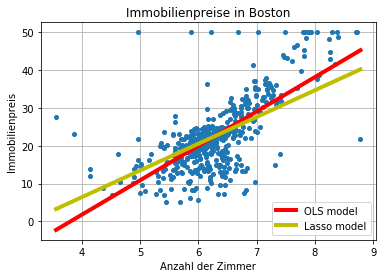

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.plot(x_old[:,0], y, 'o', markersize = 4)

plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Anzahl der Zimmer')
ax.set_ylabel('Immobilienpreis')

x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', lw=4, color = 'r', label='OLS model')

# equivalent to las = Lasso(alpha = 1.0)
las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'y', label='Lasso model')
plt.grid(True)
plt.legend()

Wir sehen, dass die Gerade nach Lasso nicht mehr ganz so gut zu unseren Trainingsdaten passt, dafür aber eine bessere Abschätzung im Allgemeinen bietet.

##### 5.2.2 Plot mit OLS, Lasso und Ridge

Im folgenden Code wird sowohl eine Gerade mithilfe von OLS durch die uns bekannten Punkte gelegt als auch eine Gerade mithilfe des *L1 penalty (Lasso)* sowie des *L2 penalty (Ridge)*. Das alpha beträgt für Lasso nach wie vor <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html">per Default 1</a>, bei Ridge jedoch ist alpha = 15 gesetzt, da sich andernfalls keine Gerade erkennen ließe.

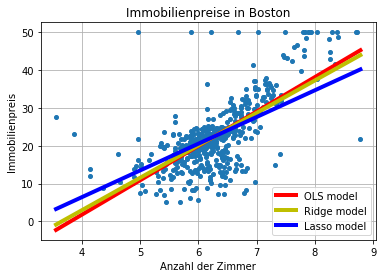

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

boston = load_boston()
fig, ax = plt.subplots()
ax.plot(x_old[:,0], y, 'o', markersize = 4)

plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Anzahl der Zimmer')
ax.set_ylabel('Immobilienpreis')

x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', lw=4, color = 'r', label='OLS model')

ridge = Ridge(15)
ridge.fit(x, y)
ax.plot([xmin, xmax], ridge.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'y', label='Ridge model')

las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'b', label='Lasso model')
plt.grid(True)
plt.legend()

##### 5.2.3 Plot mit OLS, Lasso, Ridge und Elastic nets

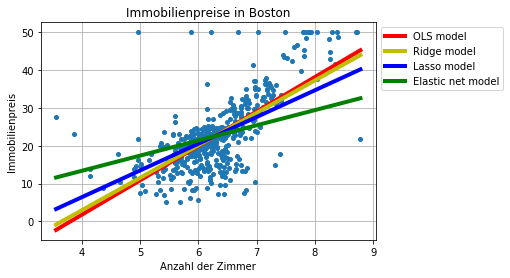

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet

boston = load_boston()
fig, ax = plt.subplots()
ax.plot(x_old[:,0], y, 'o', markersize = 4)

plt.title('Immobilienpreise in Boston')
ax.set_xlabel('Anzahl der Zimmer')
ax.set_ylabel('Immobilienpreis')

x = boston.data[:, 5]
xmin = x.min()
xmax = x.max()
x = np.transpose(np.atleast_2d(x))
y = boston.target

lr = LinearRegression()
lr.fit(x, y)
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]), '-', lw=4, color = 'r', label='OLS model')

ridge = Ridge(15)
ridge.fit(x, y)
ax.plot([xmin, xmax], ridge.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'y', label='Ridge model')

las = Lasso()
las.fit(x, y)
ax.plot([xmin, xmax], las.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'b', label='Lasso model')

net = ElasticNet()
net.fit(x, y)
ax.plot([xmin, xmax], net.predict([ [xmin], [xmax] ]), '-', lw=4, color = 'g', label='Elastic net model')
plt.grid(True)
ax.legend(loc=0, bbox_to_anchor=(1,1))

Wie im Bild zu sehen, weicht der Plot *elastic net* deutlich stärker von der ursprünglichen Regression nach OLS ab.

##### 5.2.4 Berechnung der RMSE

Im folgenden Überblick sieht man die durchschnittliche Fehlerquadratsumme für die bis jetzt bekannten Methoden (adoptiert von <a href="http://facweb.cs.depaul.edu/mobasher/classes/csc478/Notes/IPython%20Notebook%20-%20Regression.html">DePaul University</a>).

In [14]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)

    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(x))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

Method: linear regression
RMSE on training: 6.6031
RMSE on 10-fold CV: 7.0478


Method: lasso
RMSE on training: 6.6169
RMSE on 10-fold CV: 7.0754


Method: ridge
RMSE on training: 6.6031
RMSE on 10-fold CV: 7.0477


Method: elastic-net
RMSE on training: 6.8073
RMSE on 10-fold CV: 7.2483


